# Red Team Final Report 
### Irina Koleva and Mary Ardoin
#### CSCI-257: A Walk Through the Ages

### Import all necessary packages

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import datetime
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

### Compile participant data into one dataframe, df

In [134]:
# make a dictionary of all participant file names
files = ["fitbit_data_salvino.csv", "fitbit_data_ozboyd.csv", "fitbit_data_koleva.csv", "fitbit_data_Perkins.csv", "fitbit_data_fritz.csv", "fitbit_data_nelson.csv", "fitbit_data_ardoin.csv", "fitbit_data_eberly.csv", "fitbit_data_whiting.csv", "fitbit_data_dentremont.csv", "fitbit_data_gazin.csv"]

# make function to read all files in dictionary to one dataframe
def createDataframe(folder):
    df = pd.read_csv(folder[0])
    for file in folder[1:]:
        small = pd.read_csv(file)
        df = df.append(small)
    return df

# call function and display new dataframe
df = createDataframe(files)
display(df)

,Exercise,Resp Rate,Likert Scale,Height(in),Weight(lb),Heart Rate,Steps,Calories
0,Resting,13,0,74.0,181,60,0,1.32910
1,Sprint,27,3,74.0,181,113,112,9.83534
2,Sprint,32,3,74.0,181,133,134,12.36063
3,Sprint,33,3,74.0,181,133,130,12.36063
4,Sprint,35,3,74.0,181,132,119,11.96190
...,...,...,...,...,...,...,...,...
6,Jog,25,2,72.0,185,134,131,13.00000
7,Jog,30,2,72.0,185,142,130,10.00000
8,Jog,30,1,72.0,185,138,122,11.00000
9,Jog,30,1,72.0,185,143,149,12.00000


## Exploratory Data Analysis

Visualizing each of the features using boxplots

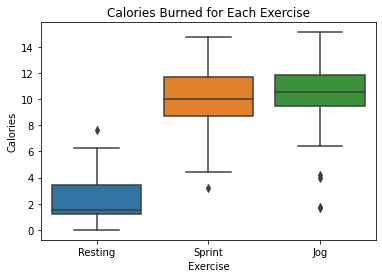

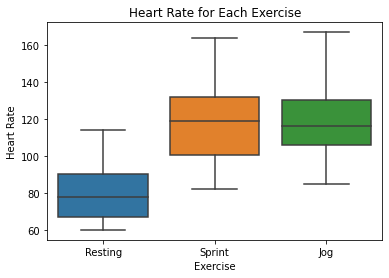

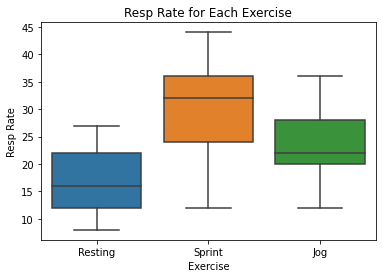

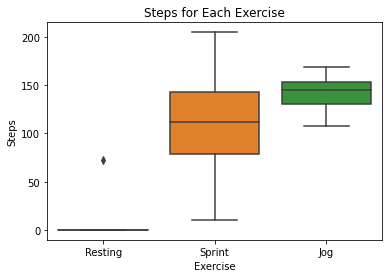

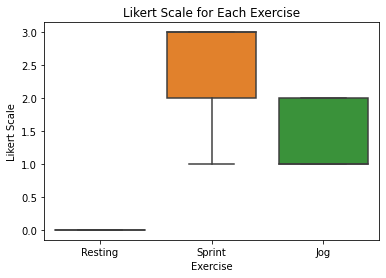

In [191]:
sns.boxplot(x="Exercise", y="Calories", data=df)
plt.title("Calories Burned for Each Exercise")
plt.savefig("CALORIES.png")

plt.show()
sns.boxplot(x="Exercise", y="Heart Rate", data=df)
plt.title("Heart Rate for Each Exercise")
plt.savefig("HEART.png")
plt.show()
sns.boxplot(x="Exercise", y="Resp Rate", data=df)
plt.title("Resp Rate for Each Exercise")
plt.savefig("resprate.png")
plt.show()
sns.boxplot(x="Exercise", y="Steps", data=df)
plt.title("Steps for Each Exercise")
plt.savefig("steps.png")
plt.show()
sns.boxplot(x="Exercise", y="Likert Scale", data=df)
plt.title("Likert Scale for Each Exercise")
plt.savefig("likert.png")
plt.show()

### Analysis
Visually, it seems that there is no difference between the running and jogging groups for heart rate and calories burned. Additionally, there seems to be quite a large difference between the two exercise groups for steps, resp rate, and likert scale. Next, we will test the significance using independent t-tests.

## Running independent t-tests to check significance between exercise types

H0 for each of the t-tests is that there is no significant difference between the exercise types.

A function has been written below that runs an independent t-test to compare the two exercise groups.

In [136]:
# Split data into series for each exercise type and each feature
CalSprint = df.loc[df['Exercise'] == "Sprint", "Calories"]
CalJog = df.loc[df['Exercise'] == "Jog", "Calories"]
HRSprint = df.loc[df['Exercise'] == "Sprint", "Heart Rate"]
HRJog = df.loc[df['Exercise'] == "Jog", "Heart Rate"]
RRSprint = df.loc[df['Exercise'] == "Sprint", "Resp Rate"]
RRJog = df.loc[df['Exercise'] == "Jog", "Resp Rate"]
StepsSprint = df.loc[df['Exercise'] == "Sprint", "Steps"]
StepsJog = df.loc[df['Exercise'] == "Jog", "Steps"]
LikertSprint = df.loc[df['Exercise'] == "Sprint", "Likert Scale"]
LikertJog = df.loc[df['Exercise'] == "Jog", "Likert Scale"]

In [137]:
# Write function to compare the two groups using the stats.ttest_ind
def compare_2_groups(arr1, arr2, alpha):
    from scipy import stats
    stat, p = stats.ttest_ind(arr1, arr2)
    print("Statistics = %.3f, p = %.3f" % (stat,p))
    if p > alpha:
        print("Same distributions: fail to reject H0")
    else:
        print("Significantly different distributions: reject H0")

In [138]:
# T-test for Calories
compare_2_groups(CalSprint, CalJog, 0.05)

Statistics = -0.489, p = 0.626
Same distributions: fail to reject H0


In [139]:
# T-test for Heart Rate
compare_2_groups(HRSprint, HRJog, 0.05)

Statistics = 0.323, p = 0.747
Same distributions: fail to reject H0


In [140]:
# T-test for Resp Rate
compare_2_groups(RRSprint, RRJog, 0.05)

Statistics = 4.665, p = 0.000
Significantly different distributions: reject H0


In [141]:
# T-test for Steps
compare_2_groups(StepsSprint, StepsJog, 0.05)

Statistics = -4.574, p = 0.000
Significantly different distributions: reject H0


In [142]:
# T-test for Likert Scale
compare_2_groups(LikertSprint, LikertJog, 0.05)

Statistics = 8.578, p = 0.000
Significantly different distributions: reject H0


### Analysis
As expected, there was no significant difference between exercise types for Heart Rate or Calories. However, there were significant differences for Resp Rate, Steps and Likert Scale

## Testing for Correlation

Visualizing scatterplots of various features and running Pearson's correlation to look for correlation between any features.

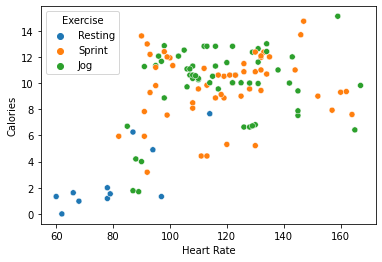

Pearsons correlation: 0.455


In [143]:
#Scatterplot of Heart Rate vs Calories
sns.scatterplot(data=df, x="Heart Rate", y="Calories", hue="Exercise")
plt.savefig("HeartrateVsCalories.png")
plt.show()
# calculate Pearson's correlation
corr, _ = pearsonr(df["Heart Rate"], df.Calories)
print('Pearsons correlation: %.3f' % corr)

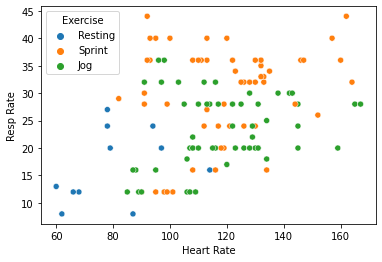

Pearsons correlation: 0.366


In [144]:
#Scatterplot of Heart Rate vs Resp Rate
sns.scatterplot(data=df, x="Heart Rate", y="Resp Rate", hue="Exercise")
plt.show()
corr1, _ = pearsonr(df["Heart Rate"], df["Resp Rate"])
print('Pearsons correlation: %.3f' % corr1)

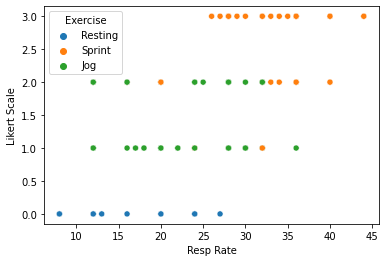

Pearsons correlation for resp rate and likert scale: 0.571


In [197]:
sns.scatterplot(data=df, x="Resp Rate", y="Likert Scale", hue="Exercise")
plt.show()
corr4, _ = pearsonr(df["Resp Rate"], df["Likert Scale"])
print('Pearsons correlation for resp rate and likert scale: %.3f' % corr4)

In [196]:
corr2, _ = pearsonr(df["Resp Rate"], df["Calories"])
print('Pearsons correlation for resp rate and calories: %.3f' % corr2)

Pearsons correlation for resp rate and calories: 0.237


In [195]:
corr3, _ = pearsonr(df["Resp Rate"], df["Steps"])
print('Pearsons correlation for resp rate and steps: %.3f' % corr3)

Pearsons correlation for resp rate and steps: -0.107


In [193]:
corr5, _ = pearsonr(df["Heart Rate"], df["Likert Scale"])
print('Pearsons correlation for heart rate and likert scale: %.3f' % corr5)

Pearsons correlation for heart rate and likert scale: 0.351


In [192]:
corr6, _ = pearsonr(df["Weight(lb)"], df["Calories"])
print('Pearsons correlation for weight and calories: %.3f' % corr6)

Pearsons correlation for weight and calories: 0.401


### Analysis

None of the features had a particularly high correlation. This is likely due to the small sample size (only 11 participants). 

The features with the highest correlation were Resp Rate and Likert Scale (corr = 57.1%), followed by Calories and Heart Rate (corr = 45.5%).

## Machine Learning Model #1: Decision Tree

In [150]:
X = df.drop(['Exercise', "Weight(lb)", "Height(in)", "Heart Rate"], axis=1)
# X = df[["Calories", "BP Systolic", "BP Diastolic"]]
# X = df[["Pulse Rate(min)"]]
y = df.Exercise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision tree DecisionTreeClassifier() {'criterion': 'gini'} 0.92
decision tree DecisionTreeClassifier(criterion='entropy') {'criterion': 'entropy'} 0.92


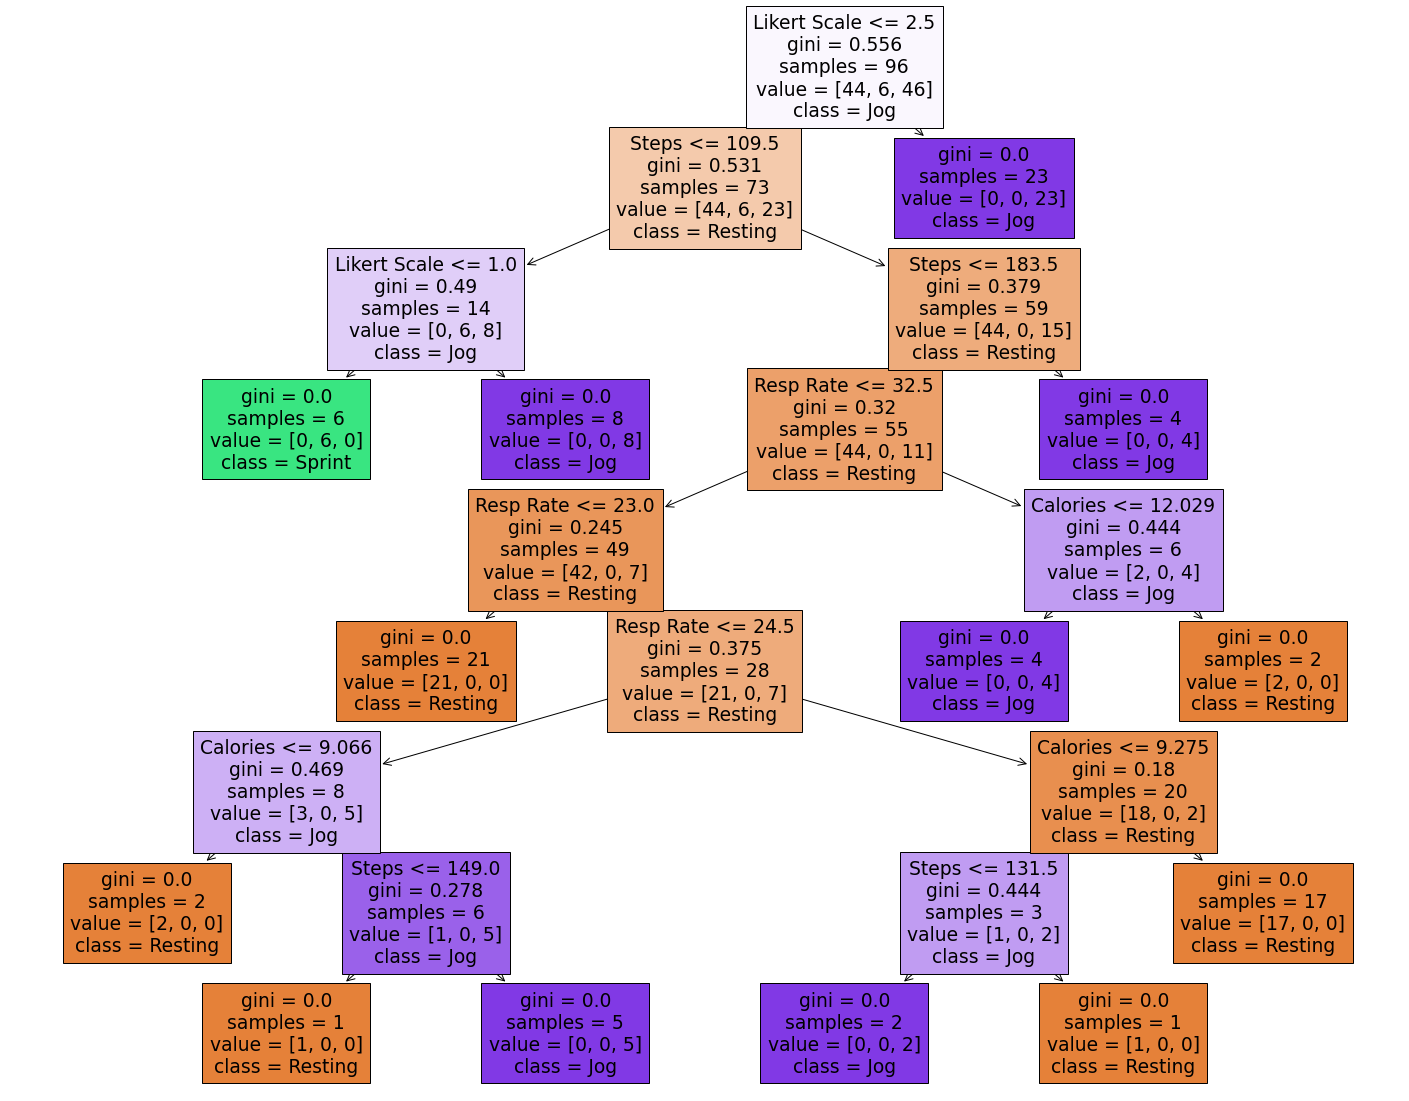

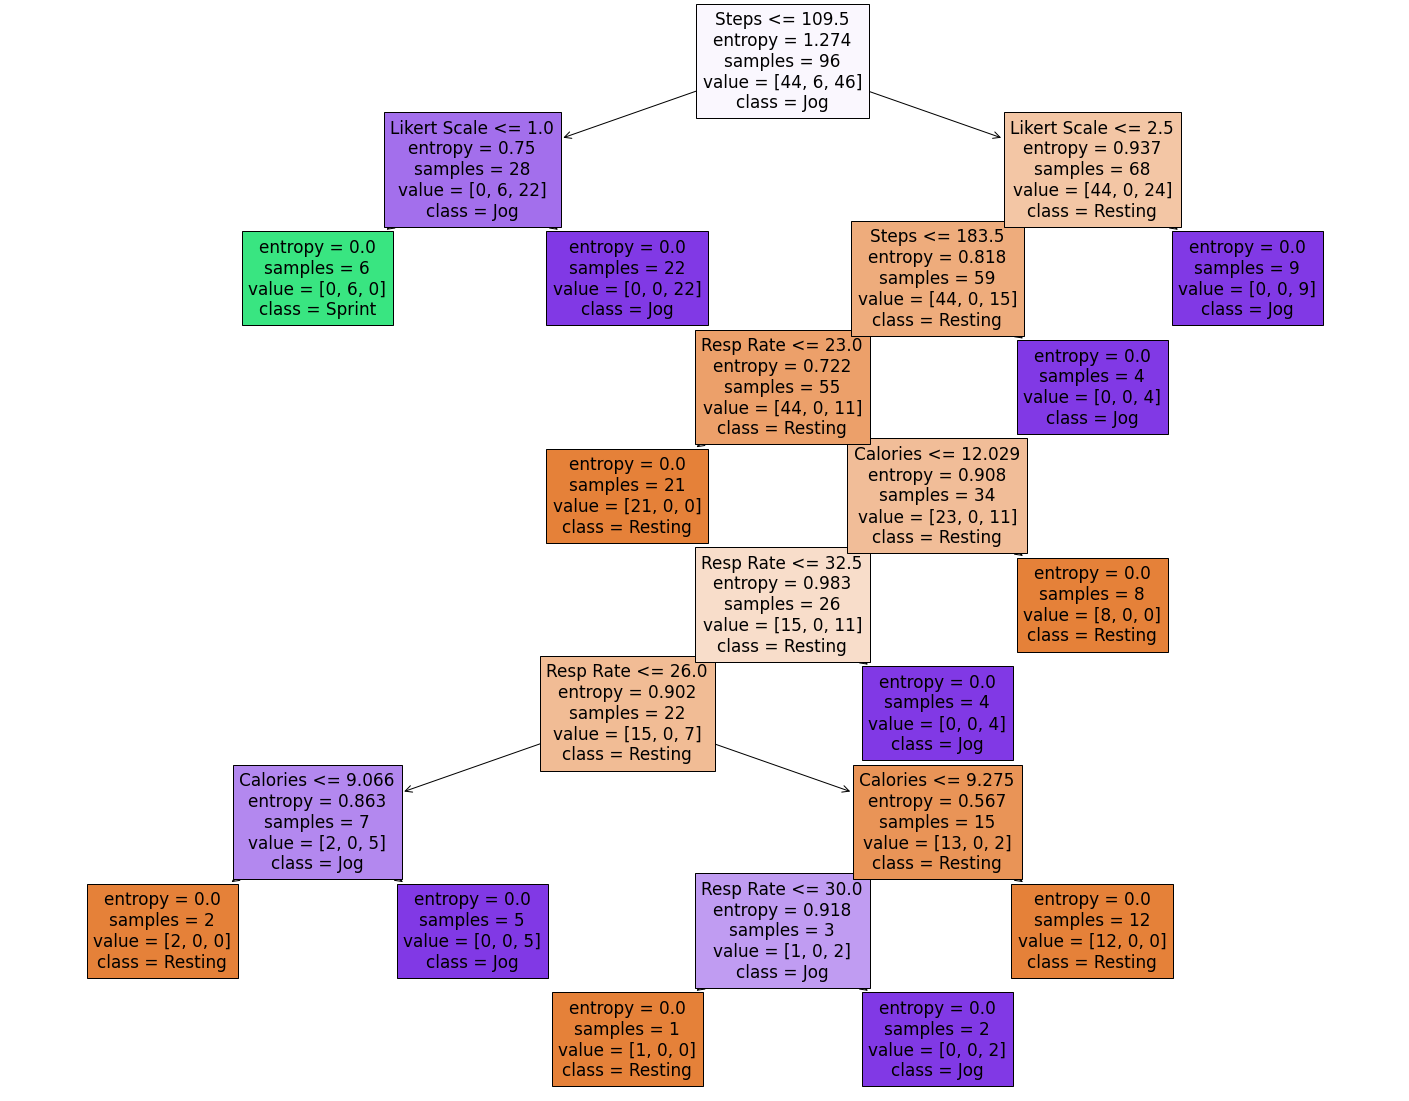

In [151]:
def testMLModels(X_train, y_train, X_test, y_test):
    
    dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
    
    modelclasses = [
    ["decision tree", DecisionTreeClassifier, dec_tree_params],
    ]
    
    for modelname, Model, params_list in modelclasses:
        for params in params_list:
            model = Model(**params)
            model.fit(X_train, y_train)
            fig = plt.figure(figsize=(25,20))
            visualize = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=y.unique(),
                   filled=True)
            score = model.score(X_test, y_test)
            print(modelname, model, params, score)
testMLModels(X_train, y_train, X_test, y_test)

## Machine Learning Model #2: K-Nearest Neighbors

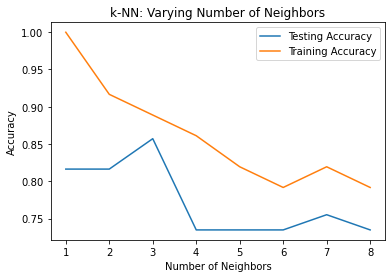

[0.81632653 0.81632653 0.85714286 0.73469388 0.73469388 0.73469388
 0.75510204 0.73469388]


In [152]:
y = df.Exercise.values
X = df.drop(['Exercise', "Weight(lb)", "Height(in)", "Heart Rate"], axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)


# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

print(test_accuracy)

Best accuracy for k-nearest neighbors is with 3 neighbors (accuracy of 85.7%)

## Machine Learning Model #3: LogReg

In [182]:
#drop the resting column to make the classification binary
df1 = df[df.Exercise != "Resting"]

In [189]:
y = df1.Exercise.values
X = df1.drop(['Exercise', "Height(in)", "Weight(lb)", "Resp Rate", "Likert Scale", "Steps"], axis=1).values
# X = df1.drop(['Exercise', "Height(in)", "Weight(lb)", "Heart Rate"], axis=1).values

In [190]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12 11]
 [ 6 15]]
              precision    recall  f1-score   support

         Jog       0.67      0.52      0.59        23
      Sprint       0.58      0.71      0.64        21

    accuracy                           0.61        44
   macro avg       0.62      0.62      0.61        44
weighted avg       0.62      0.61      0.61        44



When model is built just off of calories and heart rate, it's actually not a great predictor of exercise type. Precision for jog and spring are .67 and .58, respectively. Interestingly, the best model includes resp rate, likert scale, steps, and calories, with .91 and .86 precision for jog and sprint respectively, and .89 accuracy overall. Weight and height didn't seem to have any impact.

## Machine Learning Model #3: Support Vector Machines (SVM)

In [179]:
df1.Exercise[df1.Exercise == 'Sprint'] = 1
df1.Exercise[df1.Exercise == 'Jog'] = 0

df1

<ipython-input-179-9d4154c5fa44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Exercise[df1.Exercise == 'Sprint'] = 1
C:\Users\irina\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-179-9d4154c5fa44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Exercise[df1.Exercise == 'Jog'] = 0


,Exercise,Resp Rate,Likert Scale,Height(in),Weight(lb),Heart Rate,Steps,Calories
1,1,27,3,74.0,181,113,112,9.83534
2,1,32,3,74.0,181,133,134,12.36063
3,1,33,3,74.0,181,133,130,12.36063
4,1,35,3,74.0,181,132,119,11.96190
5,1,36,3,74.0,181,146,126,13.68973
...,...,...,...,...,...,...,...,...
6,0,25,2,72.0,185,134,131,13.00000
7,0,30,2,72.0,185,142,130,10.00000
8,0,30,1,72.0,185,138,122,11.00000
9,0,30,1,72.0,185,143,149,12.00000


In [173]:
y = df1.Exercise.values
# X = df1.drop(['Exercise', "Height(in)", "Weight(lb)", "Resp Rate", "Likert Scale", "Steps"], axis=1).values
X = df1.drop(['Exercise', "Height(in)", "Weight(lb)", "Heart Rate"], axis=1).values

clf = svm.SVC()
clf.fit(X, y)

SVC()

This model was attempted but we didn't have enough time to implement it properly. It likely would have been the best model for classification.